# 1. Customer Address Table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date

In [2]:
df = pd.read_excel('C:\\Users\\Anil modi\\Downloads\\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress', skiprows=1)
df

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


      The Data type of columns look fine, lets further process to check null and data consistency by Data
      preprocessing

In [4]:
print("Total number of rows in this dataset is ", df.shape[0])
print("Total number of columns in this dataset is ", df.shape[1])

Total number of rows in this dataset is  3999
Total number of columns in this dataset is  6


## Lets check numerical and categorical columns

In [5]:
num_cols = df.select_dtypes(include = ['int', 'float']).columns.to_list()
cat_cols = df.select_dtypes(include = ['object']).columns.to_list()

print('Number of Numerical columns is ', num_cols)
print('Number of Categorical columns is ', cat_cols)

Number of Numerical columns is  ['customer_id', 'postcode', 'property_valuation']
Number of Categorical columns is  ['address', 'state', 'country']


## Lets Check Missing values
    Lets check missing values in this dataset, if present missing values in this dataste than we fill the missing values
    depending upon the columns sitution, we can drop, and fill

In [6]:
df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

Great, No any missing values in dataste

## Lets check data Inconsistency
        lets do the check data inconsistency in columns  ['address', 'state', 'country']
        if data have inconsistency then we will solved

In [7]:
df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [8]:
def state(word):
    if word == 'New South Wales':
        return 'NSW'
    elif word == 'Victoria':
        return 'VIC'
    else:
        return word
    
df['state'] = df['state'].apply(state)

In [9]:
df['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

   solved this in consistency

In [10]:
df['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [11]:
df[['address','postcode', 'state' , 'country']]

,address,postcode,state,country
0,060 Morning Avenue,2016,NSW,Australia
1,6 Meadow Vale Court,2153,NSW,Australia
2,0 Holy Cross Court,4211,QLD,Australia
3,17979 Del Mar Point,2448,NSW,Australia
4,9 Oakridge Court,3216,VIC,Australia
...,...,...,...,...
3994,1482 Hauk Trail,3064,VIC,Australia
3995,57042 Village Green Point,4511,QLD,Australia
3996,87 Crescent Oaks Alley,2756,NSW,Australia
3997,8194 Lien Street,4032,QLD,Australia


## Check Duplicated
     We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to        poor data quality. If there are duplicate rows of data then we need to drop such records.
     For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply         drop_duplicates() function provided by Python.

In [12]:
cust_address_dedupped = df.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_address_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(df.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3999
Number of records in original dataset : 3999


## SO exporting save file
    so after cleaning data we save this cleaned data into csv for joining to other tables

In [13]:
df.to_csv('CustomerAddress_Cleaned.csv', index=False)

# Checking for Master-Detail Record Counts
    Checking with the Master Table (CustomerDemographic_Cleaned.csv) containing the entire Customer Data 
    for the Customer IDs    which are getting dropped from the Customer Address Dataset.
    Basically these are the Customers who have an address but are not a part of the Demographics dataset yet.

# 2. Customer Demographical Table

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [58]:
cust_demo =  pd.read_excel('C:\\Users\\Anil modi\\Downloads\\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic',
                          skiprows =1)
cust_demo.head()

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_15912\3486736019.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_demo =  pd.read_excel('C:\\Users\\Anil modi\\Downloads\\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic',


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [59]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

The Datatype of columns look fine, all data types are correct according to columns, 
lets check null values and default columns if have than we wii handle it by preprocessing step. 

In [60]:
print('Number of total rows in customer demographical is =', cust_demo.shape[0])
print('Number of total columns in customer demographical is =', cust_demo.shape[1])

Number of total rows in customer demographical is = 4000
Number of total columns in customer demographical is = 13


## Let's check numerical and Categorical columns

In [61]:
num_cols = cust_demo.select_dtypes(include = ['int','float']).columns.to_list()
cat_cols = cust_demo.select_dtypes(include = 'object').columns.to_list()

print('Numerical columns = ',num_cols)
print()
print('Categorical columns = ', cat_cols)

Numerical columns =  ['customer_id', 'past_3_years_bike_related_purchases', 'tenure']

Categorical columns =  ['first_name', 'last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car']


### Let's check missing Values,Data Preprocessing
     Now we will check the nulls values in dataset, if data have null values than we fill the missing values 
     according to columns situtions, and ditribution and delete default columns

### Lets delete default columns

In [62]:
cust_demo.drop(columns = 'default',inplace = True)

In [63]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [64]:
round((cust_demo.isnull().sum()*100) / cust_demo.shape[0], 2)

customer_id                             0.00
first_name                              0.00
last_name                               3.12
gender                                  0.00
past_3_years_bike_related_purchases     0.00
DOB                                     2.17
job_title                              12.65
job_industry_category                  16.40
wealth_segment                          0.00
deceased_indicator                      0.00
owns_car                                0.00
tenure                                  2.17
dtype: float64

 so we found that last_name, DOB, job_title, job_industry_category,tenure have null values
 
 lets find custmer id and first name is null where last name is null

In [65]:
cust_demo[cust_demo['last_name'].isnull()][['customer_id', 'first_name']].isnull().sum()

customer_id    0
first_name     0
dtype: int64

      Since All customers have a customer_id and First name, all the customers are identifiable. 
      Hence it is okay for to not have a last name. Filling null last names with "None".

    SO we fill the last name by None

In [66]:
cust_demo['last_name'].fillna("None", inplace = True)

     And DOB missing values is less than 5% so we remove this null values,
     and after remove DOB null value than Tanur automatic rmeove null values

In [70]:
dob_drop_index = cust_demo[cust_demo['DOB'].isnull()].index

In [71]:
cust_demo.drop(index = dob_drop_index, inplace = True, axis =0)

In [75]:
cust_demo[['job_title', 'job_industry_category']].isnull().sum()

job_title                497
job_industry_category    656
dtype: int64

     Job title and job_industry_category are having null values, so we fill missing replace by "Missing" word

In [77]:
cust_demo['job_title'].fillna("Missing", inplace = True)

In [79]:
cust_demo['job_industry_category'].fillna("Missing", inplace = True)

In [80]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [81]:
print("SO After Cleaning Data, we have total rows remaining = ", cust_demo.shape[0])

SO After Cleaning Data, we have total rows remaining =  3913


### Let's Check Inconsistency
     Now e check Inconsistency in columns, if columns have error values or inconsistency values then
     we solved and rename this values

In [82]:
cust_demo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0


In [83]:
cust_demo['gender'].value_counts()

Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

     Hence, we found inconsistency values in gender, like F, M and wrong Speling and U,
    and we convert this inconsistency values M - Male, F - Female, U - Other

In [84]:
def arrange(gender):
    if gender =='M':
        return 'Male'
    elif gender == 'F':
        return "Female"
    elif gender == 'U':
        return "Other"
    elif gender == 'Femal':
        return 'Female'
    else:
        return gender
    
cust_demo['gender'] = cust_demo['gender'].apply(arrange)

In [85]:
cust_demo['gender'].value_counts()

Female    2039
Male      1873
Other        1
Name: gender, dtype: int64

In [86]:
cust_demo['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     963
Name: wealth_segment, dtype: int64

In [87]:
cust_demo['deceased_indicator'].value_counts()

N    3911
Y       2
Name: deceased_indicator, dtype: int64

In [88]:
cust_demo['owns_car'].value_counts()

Yes    1974
No     1939
Name: owns_car, dtype: int64

    So we found no any inconsistency ,we solved

### Now we check Duplicated rows

In [90]:
cust_demo_duplicate = cust_demo.drop('customer_id', axis =1).drop_duplicates()

print('Number of records after remove duplicate id = ', cust_demo_duplicate.shape[0])
print('Number of records before remove duplicate id = ', cust_demo.shape[0])

Number of records after remove duplicate id =  3913
Number of records before remove duplicate id =  3913


    SO no any Duplicate records in this Dataset.

### now we create new columns Age
      In this create columns we assume that last date today date 
      then we DOB subtract from Transction date

In [94]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0


In [133]:
def age(born):
    today = date.today()
    
    return today.year - born.year 

cust_demo['Age'] = cust_demo['DOB'].apply(age)

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_15912\2407002910.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_demo['Age'], bins =100, kde = False)


<Axes: xlabel='Age'>

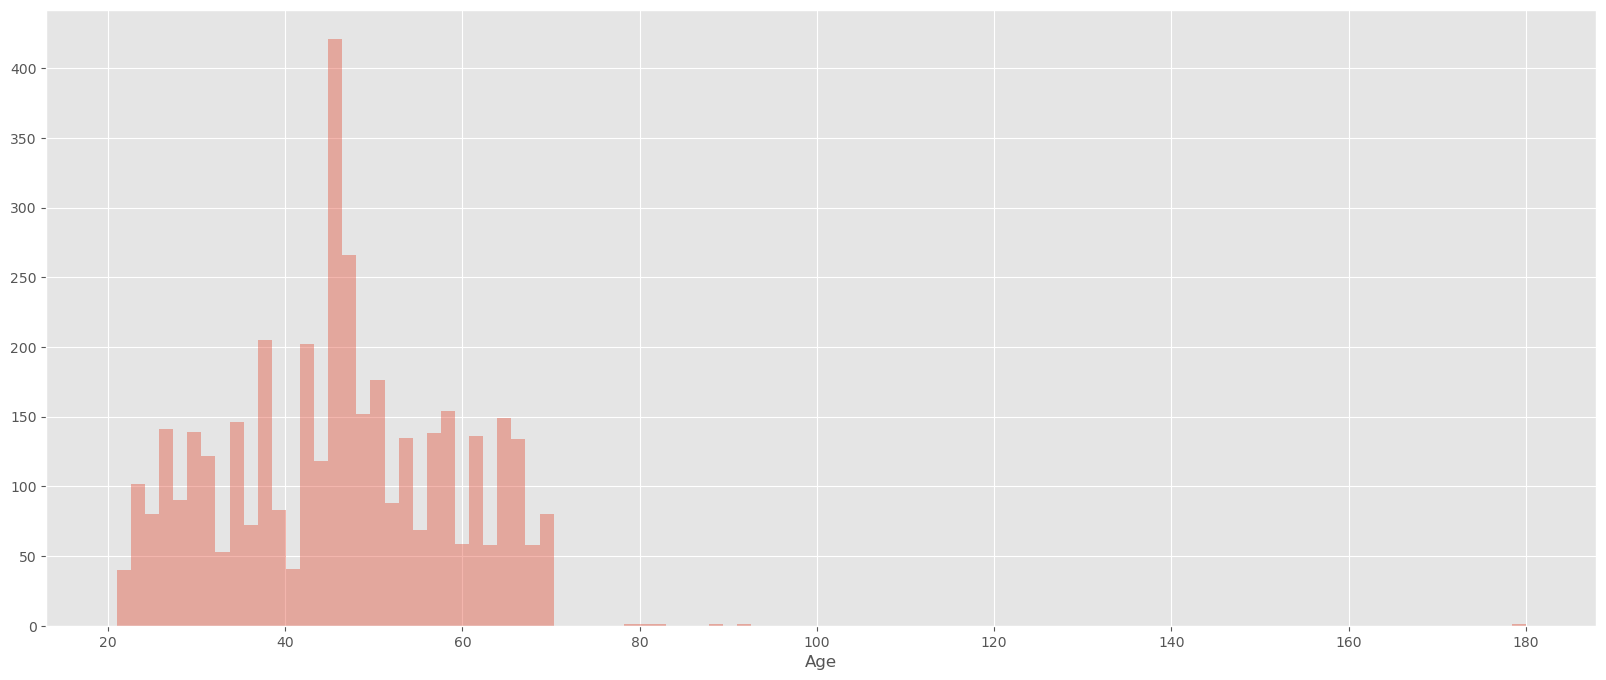

In [138]:
plt.figure(figsize = (20,8))
sns.distplot(cust_demo['Age'], bins =100, kde = False)

In [147]:
cust_demo['Age'].describe()

count    3913.000000
mean       45.969333
std        12.796387
min        21.000000
25%        36.000000
50%        46.000000
75%        55.000000
max       180.000000
Name: Age, dtype: float64

In [154]:
index_age_drop = cust_demo[cust_demo['Age']>100].index
cust_demo.drop(index = index_age_drop , inplace = True)

In [155]:
print('Number of records before remove duplicate id = ', cust_demo.shape[0])

Number of records before remove duplicate id =  3912


In [156]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46


### Exporting the Cleaned Customer Demographic Data Set to csv

In [157]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)

# 3. New Customer Table

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [5]:
new_cust =  pd.read_excel('C:\\Users\\Anil modi\\Downloads\\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'NewCustomerList'
                          ,skiprows =1)
new_cust

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_11872\3592816258.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_cust =  pd.read_excel('C:\\Users\\Anil modi\\Downloads\\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'NewCustomerList'


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997,997,0.357000


In [6]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

     SP all dataypes look like fine....and so but somes columns like  Unnamed 16, Unnamed 17, Unnamed 18
     Unnamed 19, Unnamed 20 these columns are irrelevent columns,so we drop this colums

In [7]:
print('Number of total rows in this Dataset = ', new_cust.shape[0])
print('Number of total columns in this Dataset = ', new_cust.shape[1])

Number of total rows in this Dataset =  1000
Number of total columns in this Dataset =  23


### Drop Irrelevent Columns

In [8]:
new_cust.drop(columns = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace = True)

### Let's check Numerical and Categorical columns

In [9]:
num_columns = new_cust.select_dtypes(include = ['int', 'float']).columns.to_list()
cat_columns = new_cust.select_dtypes(include = 'object').columns.to_list()

print('Numerial columns are = ', num_columns)
print()
print('Categorical columns are = ', cat_columns)

Numerial columns are =  ['past_3_years_bike_related_purchases', 'tenure', 'postcode', 'property_valuation', 'Rank', 'Value']

Categorical columns are =  ['first_name', 'last_name', 'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'address', 'state', 'country']


### Let's Check Missing Values

In [12]:
round((new_cust.isnull().sum() * 100) / new_cust.shape[0],2)

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

In [18]:
new_cust[new_cust['last_name'].isnull()][['first_name'] ].isnull().sum()

first_name    0
dtype: int64

    SO all furst name have last name , no to be take serious condition, than we replace null values 
    by None

In [19]:
new_cust['last_name'].fillna('None', inplace = True)

In [20]:
new_cust['DOB'].isnull().sum()

17

   SO DOB have null values less than 5% so we remove this null values

In [32]:
dob_drop_index = new_cust[new_cust['DOB'].isnull()].index
new_cust.drop(index = dob_drop_index, inplace = True)

    ANd job_title and job_industry_category are so many null values, so
    we replace null values with 'Missing' word

In [34]:
new_cust['job_title'].fillna('Missing', inplace = True)
new_cust['job_industry_category'].fillna('Missing', inplace = True)

In [35]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

### Let's Check inconsistency 

In [44]:
for i in ['gender', 'wealth_segment','deceased_indicator', 'owns_car', 'country']:
    values = new_cust[i].value_counts()
    print(values)
    print()

Female    513
Male      470
Name: gender, dtype: int64

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

N    983
Name: deceased_indicator, dtype: int64

No     497
Yes    486
Name: owns_car, dtype: int64

Australia    983
Name: country, dtype: int64



   These are all columns values look fine, and no need to chnage

In [45]:
new_cust[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


  Look FIne....again

### Create a columns Age

In [46]:
## Lets create a columns Age for better Analysis

def age(born):
    today = date.today()
    return today.year - born.year

new_cust['Age'] = new_cust['DOB'].apply(age)

In [47]:
new_cust['Age'].describe()

count    983.000000
mean      52.206511
std       17.074268
min       21.000000
25%       40.000000
50%       51.000000
75%       66.000000
max       85.000000
Name: Age, dtype: float64

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_11872\372890180.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age'], kde = False, bins = 50)


<Axes: xlabel='Age'>

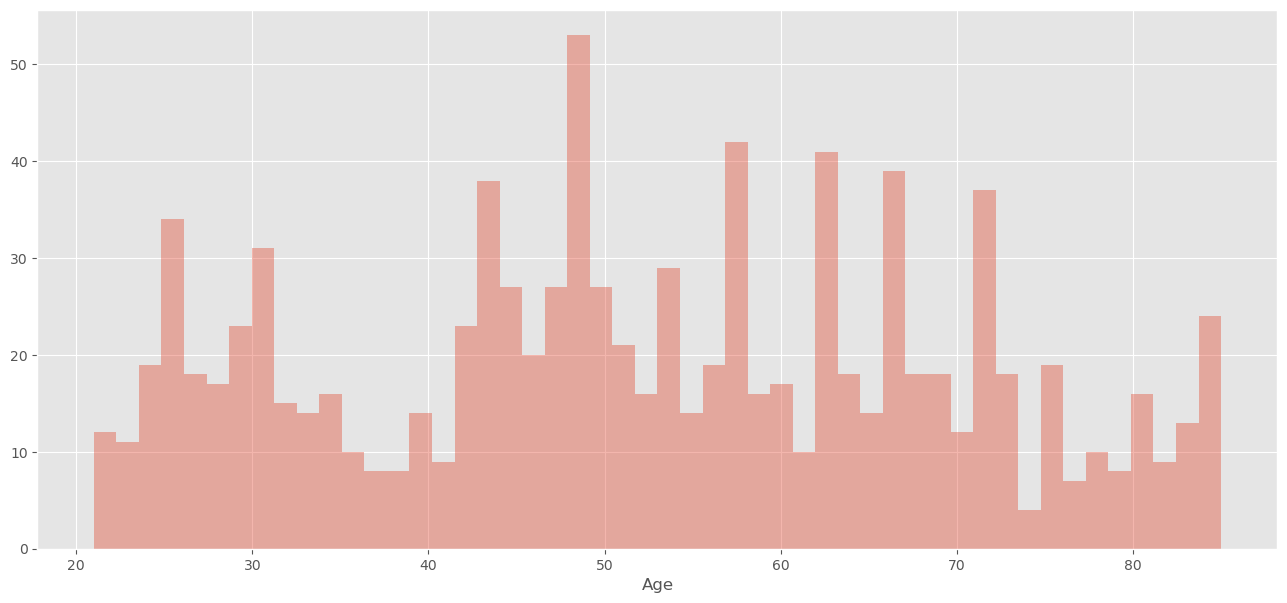

In [59]:
plt.figure(figsize = (16,7))
sns.distplot(new_cust['Age'], kde = False, bins = 50)

#### Let's create Age group

In [52]:
def age_group(age):
    if age < 30:
        return '20-30'
    elif age < 40:
        return '30-40'
    elif age < 50:
        return '40-50'
    elif age < 60:
        return '50-60'
    elif age < 70:
        return '60-70'
    elif age < 80:
        return '70-80'
    else:
        return '80-90'
new_cust['Age_group'] = new_cust['Age'].apply(age_group)

<Axes: >

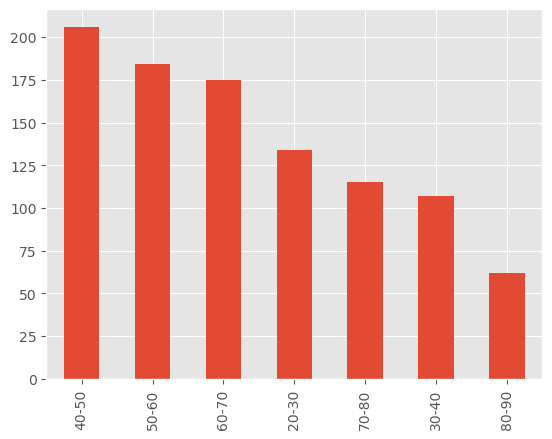

In [66]:
new_cust['Age_group'].value_counts().plot(kind = 'bar')

### Let's check Tanur Distribution

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_11872\1666479603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['tenure'], bins = 50, hist = False)


<Axes: xlabel='tenure', ylabel='Density'>

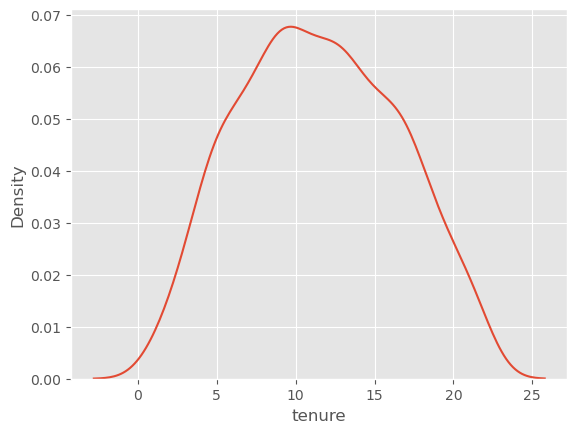

In [70]:
sns.distplot(new_cust['tenure'], bins = 50, hist = False)

    Grate, it's look like Normal Distribiution

## Drop Duplicates Record
     Let's now check that Data have Duplicates values or not, if duplicate data have than we drop it.
     for better decision making and analytics

In [71]:
drop_duplicate_cust = new_cust.drop_duplicates()

print("Total Record after REmove duplicates values is = ", drop_duplicate_cust.shape[0])
print("Total Record before REmove duplicates values is = ", new_cust.shape[0])

Total Record after REmove duplicates values is =  983
Total Record before REmove duplicates values is =  983


    No any Duplicates record

### Exporting the Cleaned New Customers Data Set to csv

In [72]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)

# 4. Transcation Table

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [3]:
trans =  pd.read_excel('C:\\Users\\Anil modi\\Downloads\\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions'
                         ,skiprows=1 )
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [4]:
print('Number of Rows in this transcation tabel is = ', trans.shape[0])
print('Number of Columns in this transction table is = ',trans.shape[1])

Number of Rows in this transcation tabel is =  20000
Number of Columns in this transction table is =  13


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

    WE look and found that product_first_sold_date is not a correct data type format we need to change
    data type from float64 to datetime

### Numerical and Categorial columns

In [6]:
num_cols = trans.select_dtypes(include = ['int', 'float']).columns.to_list()
cat_cols = trans.select_dtypes(include = ['object']).columns.to_list()

print('Numerical columns are = ', num_cols)
print()
print("Categorical colums are = ", cat_cols)

Numerical columns are =  ['transaction_id', 'product_id', 'customer_id', 'online_order', 'list_price', 'standard_cost', 'product_first_sold_date']

Categorical colums are =  ['order_status', 'brand', 'product_line', 'product_class', 'product_size']


### Check Missing Values  and Filling
     Now we let's check that null values in this dataset, if columns have null values than we remove or replace 
     null values according to dataset columns condition, let's start

In [7]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
# In percentage
round((trans.isnull().sum() * 100) / trans.shape[0],2)

transaction_id             0.00
product_id                 0.00
customer_id                0.00
transaction_date           0.00
online_order               1.80
order_status               0.00
brand                      0.98
product_line               0.98
product_class              0.98
product_size               0.98
list_price                 0.00
standard_cost              0.98
product_first_sold_date    0.98
dtype: float64

In [9]:
online_order_mode = trans['online_order'].mode()[0]
online_order_mode
trans['online_order'].fillna(online_order_mode, inplace = True)

In [10]:
trans[trans['brand'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


    We observed that whan brans columns values are missing tha all columns product_line, 
    product_class, product_size, standard_cost, product_first_sold_date are also missing,
    and these null values is equal to 1% of this dataset,
    so we can drop this null values

In [11]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']]

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,NaN,NaN
676,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19340,NaN,NaN,NaN,NaN,NaN,NaN
19383,NaN,NaN,NaN,NaN,NaN,NaN
19793,NaN,NaN,NaN,NaN,NaN,NaN
19859,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
drop_index = trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
drop_index

trans.drop(index = drop_index, inplace = True)

In [13]:
trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

    SO finally no missing values this dataset

In [14]:
print("after removing Missing values current rows we have = ", trans.shape[0])

after removing Missing values current rows we have =  19803


### Let's Check Inconsistency
    let's check inconsistency, we check one by one columns values and find any error values and inconsistency,
    if columns have inconsistency than we wil solved it.

In [15]:
for i in ['online_order','order_status', 'brand', 'product_line', 'product_class', 'product_size', ]:
    values = trans[i].value_counts()
    print(values)
    print()

1.0    10097
0.0     9706
Name: online_order, dtype: int64

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64



### Drop Duplicates record
    if Data have duplicates record than we drop it

In [16]:
trans_duplicate = trans.drop('transaction_id', axis =1).drop_duplicates()

print('Remaining rows after remove duplicates records = ', trans_duplicate.shape[0])
print('Remaing rows before remove duplicates records = ', trans.shape[0])

Remaining rows after remove duplicates records =  19803
Remaing rows before remove duplicates records =  19803


    SO both rows before remove duplicates and after removing duplicates rows are same.
    good

### Let's chnage datatype of columns

In [17]:
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'])

In [18]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 00:00:00.000037823
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 00:00:00.000035560
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 00:00:00.000040410
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 00:00:00.000038216


### Create New Columns Profit

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_14980\1910151294.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trans['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

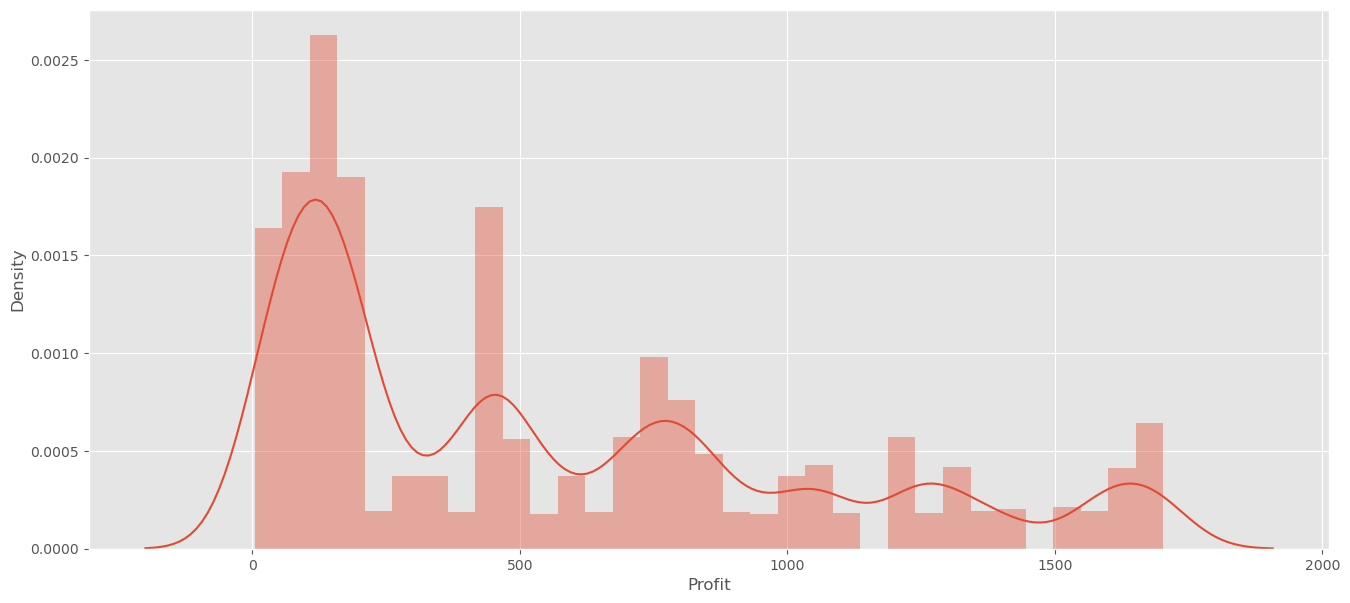

In [19]:
trans['Profit']  = trans['list_price']-trans['standard_cost']

plt.figure(figsize = (16,7))
sns.distplot(trans['Profit'])

### Exporting the Cleaned Transactions Data Set to csv

In [20]:
trans.to_csv('Transactions_Cleaned', index = False)

In [21]:
trans.to_csv('Transactions_Cleaned.csv', index=False)